In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#create new blank DFs
covid_data = pd.DataFrame()
uninsured_data = pd.DataFrame()
doctors_accepting_new_medcaid = pd.DataFrame()
state_population_data = pd.DataFrame()
insurance_data = pd.DataFrame()

#import covid/healthcare data
covid_data = pd.read_csv("covid-data.csv") #NYTimes / COVIDTracker
doctors_accepting_new_medcaid = pd.read_csv("DoctorsNotAcceptingNewMedicaid.csv") #CDC / National Center for Health Statistics
state_population_data = pd.read_csv("StatePopulation.csv") #Census Bureau
insurance_data = pd.read_csv("insurance_data.csv") #Kaiser Family Foundation

#filter data by US-only
is_us = covid_data["Country_Region"]=="US"
covid_data = covid_data[is_us]

#print to screen
insurance_data

,Location,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total
0,Alabama,0.47,0.05,0.20,0.16,0.02,0.10,1
1,Alaska,0.48,0.04,0.21,0.09,0.05,0.12,1
2,Arizona,0.44,0.05,0.22,0.16,0.01,0.11,1
3,Arkansas,0.42,0.06,0.27,0.16,0.01,0.08,1
4,California,0.47,0.07,0.26,0.11,0.01,0.07,1
5,Colorado,0.52,0.07,0.18,0.12,0.02,0.08,1
6,Connecticut,0.54,0.05,0.21,0.14,0.01,0.05,1
7,Delaware,0.50,0.05,0.21,0.17,0.01,0.06,1
8,District of Columbia,0.53,0.07,0.28,0.08,0.01,0.03,1
9,Florida,0.40,0.10,0.18,0.17,0.02,0.13,1


In [3]:
#sum covid data by states
covid_data_states = covid_data.groupby(["Province_State"]).sum()
doctors_accepting_new_medcaid = doctors_accepting_new_medcaid.groupby(["StateName"]).sum()
state_population_data = state_population_data.groupby(["NAME"]).sum()

#trim down to confirmed cases columns
covid_medicaid_columns = ["Confirmed"]
covid_data_states = covid_data_states[covid_medicaid_columns]

#a list of states
list_of_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#trim down to just the states (removing US territories, etc.)
covid_data_states = covid_data_states.filter(axis=0, items=list_of_states)

#copy total pop data to covid DF
covid_data_states["Total Population"] = state_population_data["POPESTIMATE2019"]

#figure percentage of population w/ covid
covid_data_states["Infection Rate"] = covid_data_states["Confirmed"] / covid_data_states["Total Population"]

#filter insurance data down to uninsured
insurance_data = insurance_data.groupby("Location").sum()
insurance_data_filter = ["Uninsured"]
insurance_data = insurance_data[insurance_data_filter]

#print to screen
insurance_data

,Uninsured
Location,
Alabama,0.10
Alaska,0.12
Arizona,0.11
Arkansas,0.08
California,0.07
Colorado,0.08
Connecticut,0.05
Delaware,0.06
District of Columbia,0.03


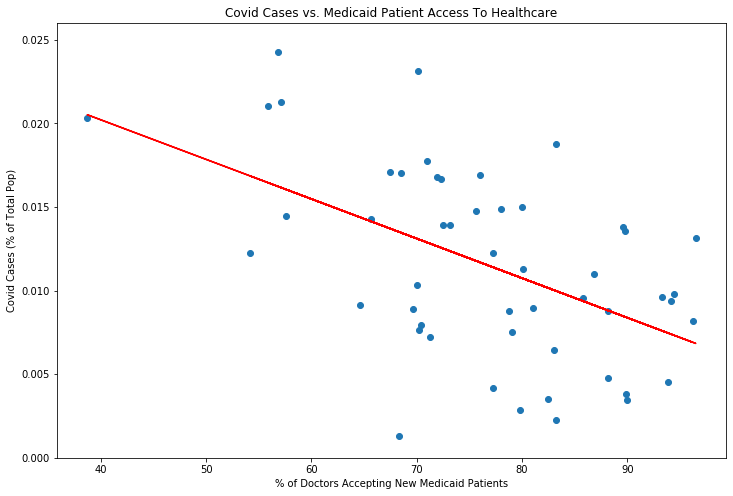

In [4]:
#setup plot
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

#plot covid-medicaid access connection
ax.scatter(doctors_accepting_new_medcaid["DoctorsAcceptingNewMedicaid"], covid_data_states["Infection Rate"])
ax.set_title("Covid Cases vs. Medicaid Patient Access To Healthcare")
ax.set_xlabel("% of Doctors Accepting New Medicaid Patients")
ax.set_ylabel("Covid Cases (% of Total Pop)")

#calcluating the linear regression
x_data = np.asarray(doctors_accepting_new_medcaid["DoctorsAcceptingNewMedicaid"])
y_data = np.asarray(covid_data_states["Infection Rate"])
slope, intercept, r_value, p_value, std_err = st.linregress(x_data,y_data)
line = slope*x_data+intercept

#plotting
plt.ylim(0, 0.026)
ax.plot(x_data, line, 'r', label='fitted line')

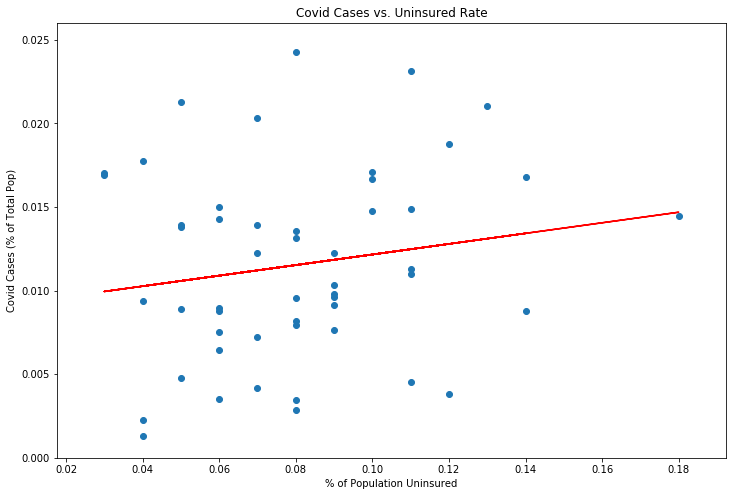

In [5]:
#setup plot
fig2 = plt.figure(figsize=(12,8))
ax2 = plt.axes()

#plot covid-medicaid access connection
ax2.scatter(insurance_data["Uninsured"], covid_data_states["Infection Rate"])
ax2.set_title("Covid Cases vs. Uninsured Rate")
ax2.set_xlabel("% of Population Uninsured")
ax2.set_ylabel("Covid Cases (% of Total Pop)")

#calcluating the linear regression
x_data2 = np.asarray(insurance_data["Uninsured"])
y_data2 = np.asarray(covid_data_states["Infection Rate"])
slope, intercept, r_value, p_value, std_err = st.linregress(x_data2,y_data2)
line = slope*x_data2+intercept

#plotting
plt.ylim(0, 0.026)
ax2.plot(x_data2, line, 'r', label='fitted line')